In [4]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict):
    name: str
    age:str
    skills: List[str]
    final: str

In [6]:
def first_node(state: AgentState) -> AgentState:
    """first node personalizes the name field with a greeting"""
    state['final']= f"Hey {state["name"]}!!! "
    return state

def second_node(state: AgentState) -> AgentState:
    """Second node describes de user's age"""
    state["final"]= state["final"] + f"You  are {state["age"]}. "
    return state

def third_node(state:AgentState) ->AgentState:
    """Third node Lists the user's skills in a formatted string""" 
    state["final"]= state["final"] + f"You have skills in: {state["skills"][0]}, {state["skills"][1]} and {state["skills"][2]} "
    return state

graph= StateGraph(AgentState)

graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)

graph.set_entry_point("first")
graph.add_edge("first", "second")
graph.add_edge("second", "third")
graph.set_finish_point("third")
app= graph.compile()

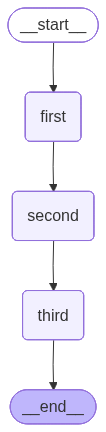

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result= app.invoke({"name":"Gabriel", "age": "21", "skills": ["Python", "Machine Learning", "LangGraph"]})
print(result)

{'name': 'Gabriel', 'age': '21', 'skills': ['Python', 'Machine Learning', 'LangGraph'], 'final': 'Hey Gabriel!!! You  are 21. You have skills in: Python, Machine Learning and LangGraph '}
